For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [315]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [316]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

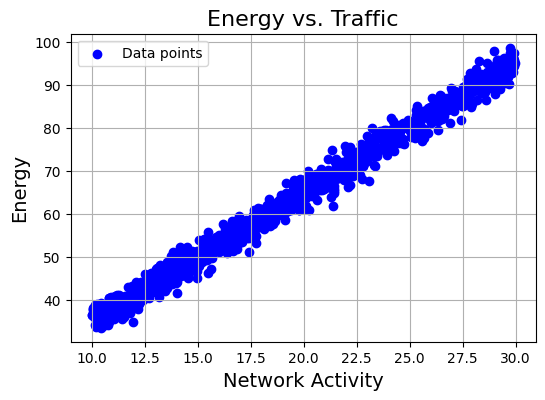

In [317]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

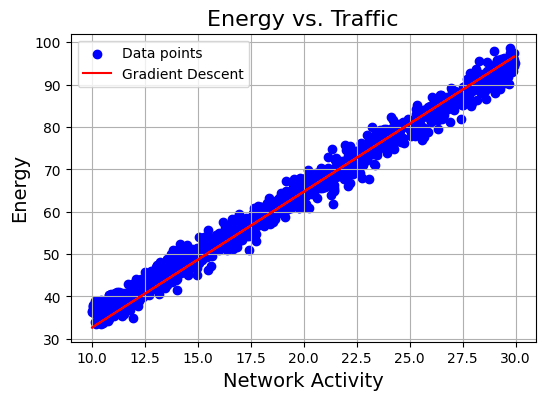

Weights: [3.21171009]
Bias: 0.49394867131336145


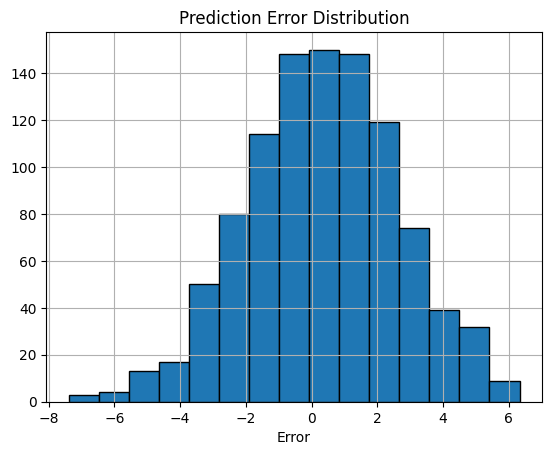

In [318]:
lr = LinearRegression()
data = pd.read_csv('mission1.csv')
lr.fit(data['Net_Activity'], data['Energy'])

y_pred = lr.predict(data['Net_Activity'])

weights = lr.weights
bias = lr.bias

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], color='blue', label='Data points')
plt.plot(data['Net_Activity'], y_pred, color='red', label='Gradient Descent')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

print(f"Weights: {weights}")
print(f"Bias: {bias}")


error = data['Energy'] - y_pred
plt.figure()
plt.grid(True)
plt.hist(error, bins=15, edgecolor="black")
plt.title('Prediction Error Distribution')
plt.xlabel('Error')
plt.ylabel('')
plt.show()


Discussion
   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   The fitted curve describes the energi consumption with the formula E = w(weight) * net activity + b(bias)
   
   b. Analyze prediction error distribution. What is an unbiased estimator?
   An unbiased estimator should have the error estimation around zero. 




## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [ ]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

X_train = train[["x0", "x1"]].values
y_train = train["y"].values  
X_test = test[["x0", "x1"]].values
y_test = test["y"].values

from logistic_regression import LogisticRegression

train_epochs = 5000
log_reg = LogisticRegression(epochs=train_epochs)
log_reg.fit(X_train, y_train)

predictions = log_reg.predict(X_test)
print(log_reg.accuracy(y_test, predictions))


>>> fit() called, starting training
0.49


a) The original logistic regression model could only learn linear decision in 2 dimensions (x0, x1). If the true decision boundary is curved, this linear decision boundary this model will work poorly. To improve the model I have introduced non-linear realationships. x2 captures the multiplicative interaction between x0 and x1. x3 captures a ratio relationship, allowing the model to see relative differences.

In [320]:
train = train.copy()
test = test.copy()


train['x2'] = train['x0'] * train['x1']
test['x2'] = test['x0'] * test['x1']


train['x3'] = train['x0'] / train['x1']
test['x3'] = test['x0'] / test['x1']


X_train = train[['x0', 'x1', 'x2', 'x3']].values
y_train = train['y'].values
X_test = test[['x0', 'x1', 'x2', 'x3']].values
y_test = test['y'].values

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print(log_reg.accuracy(y_test, y_pred))

>>> fit() called, starting training
0.938


b) The models inductive bias is that the model assumes that the data can be separated by a linear decision boundary. This is important because the model can only generalize well if the data fit this assumption.


c) 


In [321]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data_ = pd.read_csv('mission2.csv')
train_ = data_[data_['split'] == 'train'].copy()
test_ = data_[data_['split'] == 'test'].copy()

X_train_ = train_[["x0", "x1"]].values
y_train_ = train_["y"].values  
X_test_ = test_[["x0", "x1"]].values
y_test_ = test_["y"].values

clf = DecisionTreeClassifier(random_state=50)
clf.fit(X_train_, y_train_)

y_pred_ = clf.predict(X_test_)

accuracy = accuracy_score(y_test_, y_pred_)
print(f'Accuracy: {accuracy}')

Accuracy: 0.874


d)

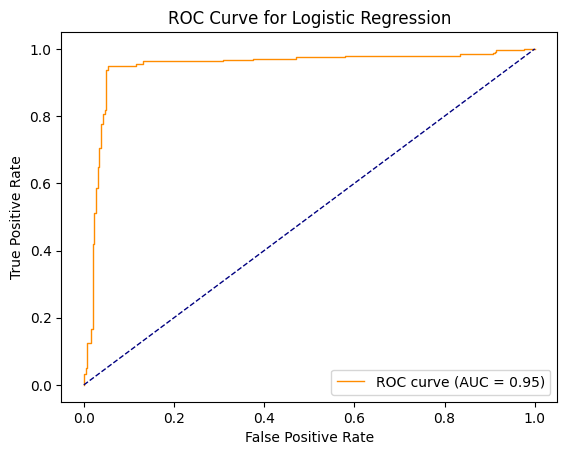

In [322]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


y_prob = log_reg.sigmoid_function(np.matmul(X_test, log_reg.weights) + log_reg.bias)


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

df_train = pd.read_csv('mission3_train.csv')
df_test  = pd.read_csv('mission3_test.csv')

X_train = df_train.drop(columns=['target'])
X_test  = df_test.drop(columns=['target'])

binary_train = (X_train['data_stream_3'] * 1e3).astype(int) % 2
binary_test  = (X_test['data_stream_3'] * 1e3).astype(int) % 2
X_train['data_stream_binary'] = binary_train
X_test['data_stream_binary'] = binary_test

y_train = df_train['target'].values
y_test  = df_test['target'].values

clf = DecisionTreeClassifier(
    max_depth=6,
    max_features= None,
    min_samples_leaf=1,
    min_samples_split=8,
    random_state=34
)
"""""
param_grid = {
    'max_depth': [3, 5, 6, 7, 10],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=34),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_clf = grid_search.best_estimator_
y_probs = best_clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC (best model):", roc_auc)
"""""

clf.fit(X_train, y_train)

y_probs = clf.predict_proba(X_test)[:, 1]


roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC on test set:", roc_auc)


ROC AUC on test set: 0.7365955916815944


a) I used GridSearchCV to find the best parameteres. And then tested close parameteres. 

b) ROC AUC measures how well the model separates positive and negative classes regardless of threshold. It is threshold-independent, unlike accuracy, which depends on choosing 0.5 as the cutoff. Useful in imbalanced datasets, where accuracy can be misleading.

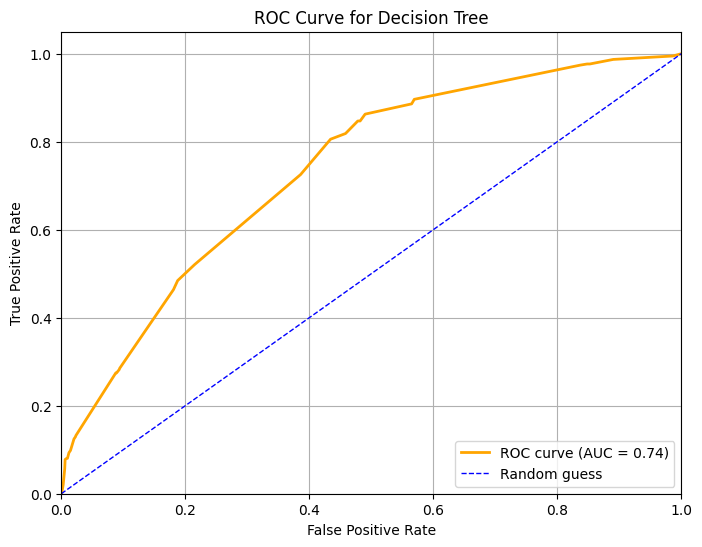

In [324]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='blue', lw=1, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

df_train = pd.read_csv('mission3_train.csv')
df_test  = pd.read_csv('mission3_test.csv')

X_train = df_train.drop(columns=['target'])
X_test  = df_test.drop(columns=['target'])

binary_train = (X_train['data_stream_3'] * 1e3).astype(int) % 2
binary_test  = (X_test['data_stream_3'] * 1e3).astype(int) % 2
X_train['data_stream_binary'] = binary_train
X_test['data_stream_binary'] = binary_test

y_train = df_train['target'].values
y_test  = df_test['target'].values

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_probs = clf.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC on test set:", roc_auc)

ROC AUC on test set: 0.7245667764572941


c) Random Forest ROC AUC does not do it as well.

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [326]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

In [327]:

num_cols_train = train.select_dtypes(include='number').columns
num_cols_test = test.select_dtypes(include='number').columns

mean_train = train[num_cols_train].mean()
var_train  = train[num_cols_train].var()

mean_test  = test[num_cols_test].mean()
var_test   = test[num_cols_test].var()

print("Sammenligning av alle numeriske kolonner (train vs test):\n")
for col in num_cols_train:
    test_col = col if col in num_cols_test else None
    print(f"{col} -> Train Mean: {mean_train[col]:.2f}, Var: {var_train[col]:.2f}")
    if test_col:
        print(f"{col} -> Test  Mean: {mean_test[col]:.2f}, Var: {var_test[col]:.2f}\n")

Sammenligning av alle numeriske kolonner (train vs test):

ownership_type -> Train Mean: 1.88, Var: 1.19
ownership_type -> Test  Mean: 1.81, Var: 1.18

nexus_rating -> Train Mean: 23556173.47, Var: 2771383135342131.00
nexus_rating -> Test  Mean: 75.14, Var: 3176.37

energy_footprint -> Train Mean: 74.45, Var: 3442.33
energy_footprint -> Test  Mean: 12.87, Var: 47.31

core_reactor_size -> Train Mean: 12.55, Var: 43.11
core_reactor_size -> Test  Mean: 39.50, Var: 1098.61

harvesting_space -> Train Mean: 38.74, Var: 985.86
harvesting_space -> Test  Mean: 9.18, Var: 63.41

vertical_alignment -> Train Mean: 8.97, Var: 69.26
vertical_alignment -> Test  Mean: 2.20, Var: 1.23

power_chambers -> Train Mean: 2.19, Var: 1.16
power_chambers -> Test  Mean: 1.04, Var: 0.11

energy_flow_design -> Train Mean: 1.04, Var: 0.12
energy_flow_design -> Test  Mean: 3.73, Var: 253.29

upper_collector_height -> Train Mean: 3.27, Var: 116.70
upper_collector_height -> Test  Mean: 0.78, Var: 0.66

shared_conversi

In [328]:

columns_to_shift = [col for col in test.columns if col != 'ownership_type']

array_values = test[columns_to_shift].to_numpy()

shifted_array = np.roll(array_values, shift=1, axis=1)

test.loc[:, columns_to_shift] = shifted_array



In [329]:

num_cols_train = train.select_dtypes(include='number').columns
num_cols_test = test.select_dtypes(include='number').columns


mean_train = train[num_cols_train].mean()
var_train  = train[num_cols_train].var()

mean_test  = test[num_cols_test].mean()
var_test   = test[num_cols_test].var()


print("Sammenligning av alle numeriske kolonner (train vs test):\n")
for col in num_cols_train:
    test_col = col if col in num_cols_test else None
    print(f"{col} -> Train Mean: {mean_train[col]:.2f}, Var: {var_train[col]:.2f}")
    if test_col:
        print(f"{col} -> Test  Mean: {mean_test[col]:.2f}, Var: {var_test[col]:.2f}\n")

Sammenligning av alle numeriske kolonner (train vs test):

ownership_type -> Train Mean: 1.88, Var: 1.19
ownership_type -> Test  Mean: 1.81, Var: 1.18

nexus_rating -> Train Mean: 23556173.47, Var: 2771383135342131.00
nexus_rating -> Test  Mean: 23270101.28, Var: 1888625073958735.25

energy_footprint -> Train Mean: 74.45, Var: 3442.33
energy_footprint -> Test  Mean: 75.14, Var: 3176.37

core_reactor_size -> Train Mean: 12.55, Var: 43.11
core_reactor_size -> Test  Mean: 12.87, Var: 47.31

harvesting_space -> Train Mean: 38.74, Var: 985.86
harvesting_space -> Test  Mean: 39.50, Var: 1098.61

vertical_alignment -> Train Mean: 8.97, Var: 69.26
vertical_alignment -> Test  Mean: 9.18, Var: 63.41

power_chambers -> Train Mean: 2.19, Var: 1.16
power_chambers -> Test  Mean: 2.20, Var: 1.23

energy_flow_design -> Train Mean: 1.04, Var: 0.12
energy_flow_design -> Test  Mean: 1.04, Var: 0.11

upper_collector_height -> Train Mean: 3.27, Var: 116.70
upper_collector_height -> Test  Mean: 3.73, Var: 2

Text(0, 0.5, 'Count')

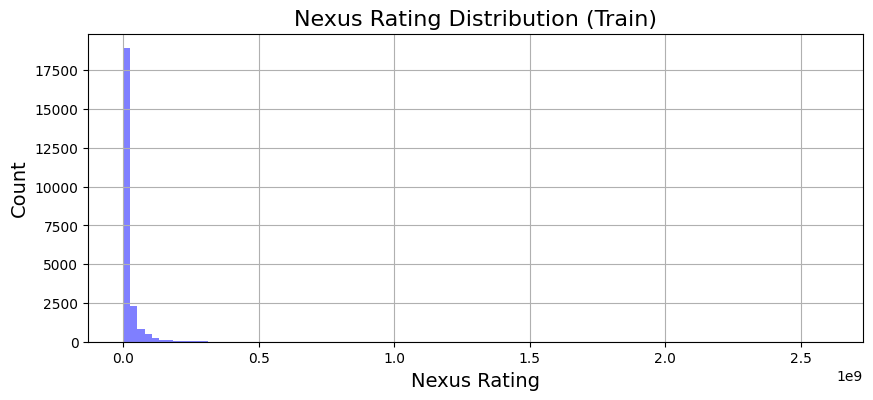

In [330]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [331]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, StackingRegressor
from sklearn.linear_model import RidgeCV


X_train = train.drop(columns=['nexus_rating'])
y_train = train['nexus_rating'].values

X_test = test.drop(columns=["nexus_rating"])
y_test = test["nexus_rating"].values

cat = CatBoostRegressor(
    iterations=2000, 
    learning_rate=0.05, 
    depth=8, 
    l2_leaf_reg=20, 
    early_stopping_rounds=200,
    verbose=0
)

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
et = ExtraTreesRegressor(
    n_estimators=500,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

estimators = [
    ('cat', cat),
    ('rf', rf),
    ('et', et)
]


stack = StackingRegressor(
    estimators=estimators,
    final_estimator=RidgeCV(alphas=(0.1, 1.0, 10.0)),
    cv=5,                
    n_jobs=-1,
    passthrough=False    
)

y_train = np.log1p(y_train)

stack.fit(X_train, y_train)

# Predict and inverse-transform
y_pred = stack.predict(X_test) 
y_pred = np.expm1(y_pred)

print('RMSLE: ', rmsle(y_test, y_pred))
print('Required RMSLE: ', 0.294)

RMSLE:  0.293251778210095
Required RMSLE:  0.294


a) First I compared the mean and varians for each column in final_mission_test and final_mission_train. I found that the test data had been shifted one column, and shifted the columns so that the test data was aligned with the training data. Then filled in the missing data and made sure test and train had the feature columns. When the data was correct The strategy that was used was stacking ensemble model. 

b) RMSLE handles large variations in nexus_rating and penalizes relative errors, so a 10% error counts the same whether the value is 1M or 50M. It prevents huge values from dominating the loss, which is important for skewed targets. I log-transformed the target and then used MSE and later inverse-transformed to compute RMSLE. 

c) 

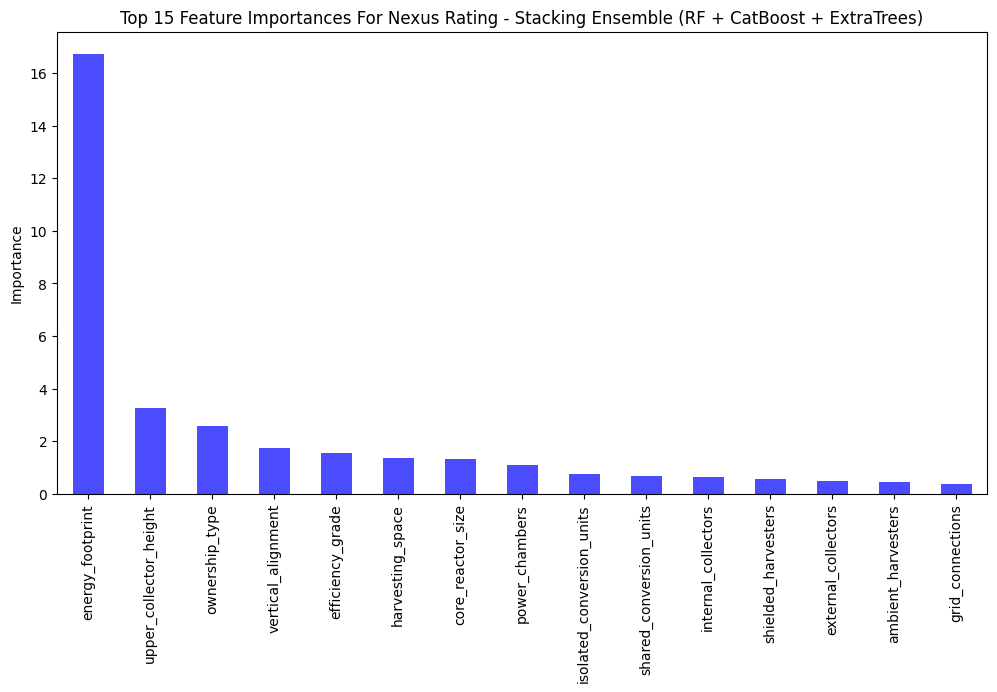

In [ ]:
rf.fit(X_train, y_train)
et.fit(X_train, y_train)
cat.fit(X_train, y_train) 

rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
et_importances = pd.Series(et.feature_importances_, index=X_train.columns)
cat_importances = pd.Series(cat.get_feature_importance(), index=X_train.columns)

ensemble_importances = (rf_importances + et_importances + cat_importances) / 3
ensemble_importances = ensemble_importances.sort_values(ascending=False)

plt.figure(figsize=(12,6))
ensemble_importances.head(15).plot(kind='bar', color='blue', alpha=0.7)
plt.title("Top 15 Feature Importances For Nexus Rating - Stacking Ensemble (RF + CatBoost + ExtraTrees)")
plt.ylabel("Importance")
plt.show()


We can see that energy footprint is the most important feature for nexus rating.

d) I used stacking ensemble model with RandomForestRegressor, CatBoostRegressor and ExtraTreesRegressor. 

e) Since we do not have the test targets, we rely on cross-validation and careful preprocessing on the training data to estimate the model’s performance on unseen data. Ensembling and regularization further help ensure robust predictions.